In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow
print(tensorflow.__version__)

2.15.0


# Data Preprocessing

In [3]:
import cv2,os
data_path='/content/drive/MyDrive/crime_image_detection/dataset'
categories=os.listdir(data_path)

labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary
print(label_dict)
print(categories)
print(labels)

{'Muderers': 0, 'Kidnapers': 1, 'chain_snatcher': 2, 'Drug_dealers': 3}
['Muderers', 'Kidnapers', 'chain_snatcher', 'Drug_dealers']
[0, 1, 2, 3]


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
img_size=256
data=[]
label=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)

    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        try:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            resized=cv2.resize(gray,(img_size,img_size))

            data.append(resized)
            label.append(label_dict[category])

        except Exception as e:
            print('Exception:',e)


Exception: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Exception: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Exception: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Exception: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Exception: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Exception: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Exception: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Exception: OpenCV(4.

# Recale and assign  catagorical labels

In [ ]:
import numpy as np
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
label=np.array(label)
# from keras.utils import np_utils
# new_label=np_utils.to_categorical(label)

from keras.utils import to_categorical
new_label = to_categorical(label)

# CNN Model

In [ ]:
data.shape

(4095, 256, 256, 1)

In [ ]:
data.shape[1:]

(256, 256, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The thrid convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
#Flatten layer to stack the output convolutions from 3rd convolution layer
model.add(Dropout(0.2))

model.add(Dense(128,activation='relu'))
#Dense layer of 128 neurons

model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
#Dense layer of 64 neurons

model.add(Dense(4,activation='sigmoid'))
#The Final layer with two outputs for two categories

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 254, 254, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 125, 125, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 60, 60, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │       3,686,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,713,860 (14.17 MB)

 Trainable params: 3,713,860 (14.17 MB)

 Non-trainable params: 0 (0.00 B)

# Splitting data into traning and testing

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,new_label,test_size=0.1)

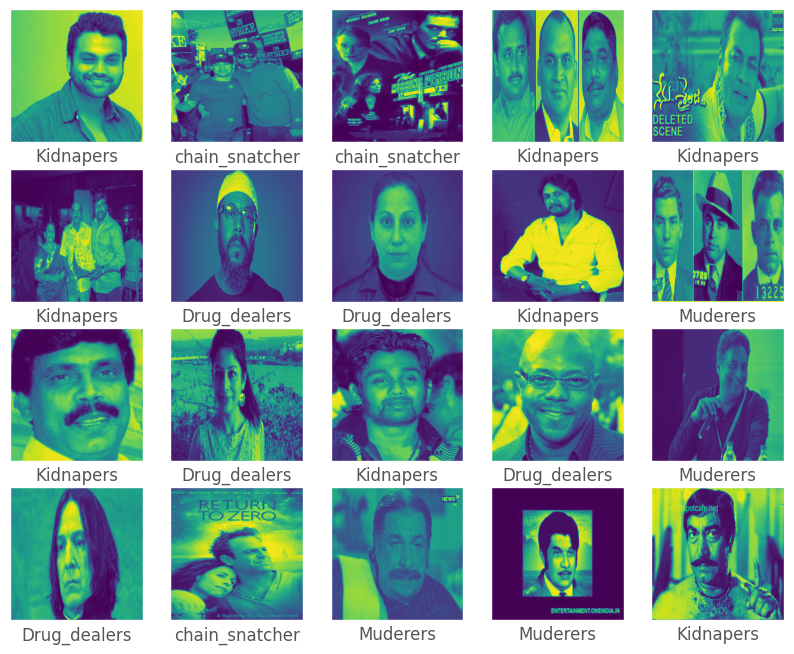

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(x_test[i]))
    plt.xlabel(categories[np.argmax(y_test[i])])
plt.show()

In [ ]:
history=model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 16s 101ms/step - accuracy: 0.2968 - loss: 0.5710 - val_accuracy: 0.3718 - val_loss: 0.5235
Epoch 2/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.3881 - loss: 0.5242 - val_accuracy: 0.3894 - val_loss: 0.5181
Epoch 3/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.4264 - loss: 0.5079 - val_accuracy: 0.4532 - val_loss: 0.5152
Epoch 4/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.5585 - loss: 0.4384 - val_accuracy: 0.4532 - val_loss: 0.5235
Epoch 5/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.7173 - loss: 0.3256 - val_accuracy: 0.4803 - val_loss: 0.5819
Epoch 6/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.8369 - loss: 0.2182 - val_accuracy: 0.4668 - val_loss: 0.7551
Epoch 7/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.9019 - loss: 0.1401 - val_accuracy: 0.4871 - val_loss: 0.9027
Epoch 8/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.9536 - loss: 0.0851 - val_accuracy: 0.4939 

In [ ]:
# model.save('model.h5')

In [ ]:
# from matplotlib import pyplot as plt

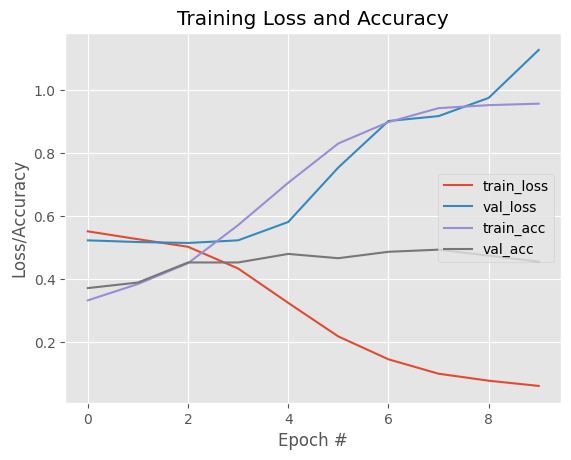

In [ ]:
# # plot the training loss and accuracy
N = 10 #number of epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model")

In [ ]:
# X = 32

# img_size = 256

# img_single = x_test[X]
# img_single = cv2.resize(img_single, (img_size, img_size))
# img_single = (np.expand_dims(img_single, 0))
# img_single = img_single.reshape(img_single.shape[0],256,256,1)

# predictions_single = model.predict(img_single)
# print('A.I predicts:',categories[np.argmax(predictions_single)])
# print("Correct prediction for label",np.argmax(y_test[X]),'is',categories[np.argmax(y_test[X])])
# plt.imshow(np.squeeze(img_single))
# plt.grid(False)
# plt.show()

In [ ]:
# from sklearn.metrics import confusion_matrix
# from mlxtend.plotting import plot_confusion_matrix

# test_labels = np.argmax(y_test, axis=1)
# predictions = model.predict(x_test)
# predictions = np.argmax(predictions, axis=-1)


# cm  = confusion_matrix(test_labels, predictions)
# plt.figure()
# plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
# plt.xticks(range(4), ['Bony Ankylosis','Fibrous Ankylosis','Pannus','Synovitis'], fontsize=16)
# plt.yticks(range(4), ['Bony Ankylosis','Fibrous Ankylosis','Pannus','Synovitis'], fontsize=16)
# plt.show()